In [84]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 

In [85]:
# Import sklearn libraries
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

In [86]:
''' Import cleaned housing data for Kings County, WA. '''
houseClean = pd.read_csv("./data/Modified/houseClean_dates.csv", index_col=False)
houseClean.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,quarter
0,0,7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,4
1,1,6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,4
2,2,5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
3,3,2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,4
4,4,1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1


In [87]:
df = houseClean[['bedrooms','sqft_living','grade','price']]
df.head()

,bedrooms,sqft_living,grade,price
0,3.0,1180.0,7,221900.0
1,3.0,2570.0,7,538000.0
2,2.0,770.0,6,180000.0
3,4.0,1960.0,7,604000.0
4,3.0,1680.0,8,510000.0


In [88]:
''' Define Dependent and Independent Variables '''
# X = houseClean[['bedrooms','sqft_living','grade']] # Independent variables
# y = houseClean['price'].values.reshape(-1,1) # Dependent variables
X = df.iloc[:,:3]
y = df.iloc[:,-1]
print(X.shape, y.shape)

(21613, 3) (21613,)


In [89]:
''' Create Training and Test sets with a 70-30 split '''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15129, 3) (6484, 3) (15129,) (6484,)


In [90]:
X_train

,bedrooms,sqft_living,grade
167,4.0,2680.0,9
12412,4.0,2340.0,7
7691,4.0,2190.0,8
12460,2.0,2260.0,9
9099,4.0,2110.0,8
...,...,...,...
11964,3.0,1000.0,7
21575,3.0,3087.0,8
5390,3.0,2120.0,7
860,1.0,380.0,5


In [91]:
y_train

167      807100.0
12412    570000.0
7691     320000.0
12460    649000.0
9099     568000.0
           ...   
11964    378000.0
21575    399950.0
5390     575000.0
860      245000.0
15795    315000.0
Name: price, Length: 15129, dtype: float64

In [92]:
sgdc = SGDClassifier(max_iter=1000, tol=0.01)
# print(sgdc)
 
sgdc.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
score = sgdc.score(X_train, y_train)
print("Training score: ", score)

Training score:  0.000198294665873488


In [94]:
y_predict = sgdc.predict(X_test)

confu_mat = confusion_matrix(y_test, y_predict)
print(confu_mat)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [95]:
class_report = classification_report(y_test, y_predict)

In [96]:
SGDClassifier(tol=0.01)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
# x, y = make_classification(n_samples=5000, n_features=10, 
#                            n_classes=3, 
#                            n_clusters_per_class=1)
# print(y)

In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X_train)

In [99]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [100]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
        #print(iteration)
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - (alpha * gradient)
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
 
    return B, cost_history

In [101]:
m = 7000
f = 2
X_train = X[:m,:f]
X_train = np.c_[np.ones(len(X_train),dtype="int64"), X_train]
y_train = y[:m]
X_test = X[m:,:f]
X_test = np.c_[np.ones(len(X_test),dtype="int64"), X_test]
y_test = y[m:]

In [102]:
# Initial Coefficients
B = np.zeros(X_train.shape[1])
alpha = 0.005
iter_ = 1000
newB, cost_history = batch_gradient_descent(X_train, y_train, B, alpha, iter_)

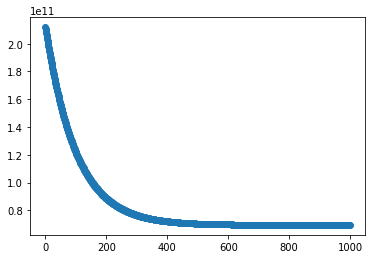

In [106]:
iter_list = [i for i in range(0, iter_)]
plt.scatter(iter_list, cost_history)

In [103]:
''' Make predictions using test set '''
y_predict = sdgc.predict(X_test, newB)
y_predict

NameError: name 'sdgc' is not defined

In [105]:

len(plot_list)  

1000

In [ ]:
def r2(y_predict, y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)
#----------------
r2(y_,y_test)